# Predicting Disaster

## Importing Libraries

In [1]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 57 kB/s 


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import catboost

## Loading  the dataset

In [3]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

## Taking Info 

In [4]:
data_train.head(40)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
data_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
print(data_train["location"].unique()[:20])
print("number of unique loactions :",len(data_train["location"].unique()))

[nan 'Birmingham' 'Est. September 2012 - Bristol' 'AFRICA'
 'Philadelphia, PA' 'London, UK' 'Pretoria' 'World Wide!!'
 'Paranaque City' 'Live On Webcam' 'milky way' 'GREENSBORO,NORTH CAROLINA'
 'England.' 'Sheffield Township, Ohio' 'India' 'Barbados' 'Anaheim'
 'Abuja' 'USA' 'South Africa']
number of unique loactions : 3342


In [10]:
print(data_train["keyword"].unique())
print("number of unique loactions :",len(data_train["keyword"].unique()))

[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'droug

what we conclude from the given data
- the keyword and location columns has missing values 
- the target has zeros more slighty than ones
- id column has no meaning for the prediction


## Counting nulls

In [11]:
data_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [12]:
data_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [13]:
def per_of_nulls(data):
    null_val = {}
    total = 0
    for column in data_train:
        amount = data_train[column].isna().sum()
        null_val[column] = amount*100/(data_train.count().max())
        total+=amount
    null_val["Total"] = total*100/(data_train.count().max())
    return null_val

In [14]:
null_percentage_train = per_of_nulls(data_train)
print('per of nulls:\nTrain dataset')
null_percentage_train

per of nulls:
Train dataset


{'Total': 34.073295678444765,
 'id': 0.0,
 'keyword': 0.8012610009194798,
 'location': 33.27203467752528,
 'target': 0.0,
 'text': 0.0}

In [15]:
null_percentage_test = per_of_nulls(data_test)
print('per of nulls:\nTest dataset')
null_percentage_test

per of nulls:
Test dataset


{'Total': 34.073295678444765,
 'id': 0.0,
 'keyword': 0.8012610009194798,
 'location': 33.27203467752528,
 'target': 0.0,
 'text': 0.0}


As we can understand
- number of null for the keyword is small while number of nulls for location is huge 
- total number of nulls is 34.07 %

----------------------------------------------------------------------------------------

## Counting values in each class 

In [16]:
data_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

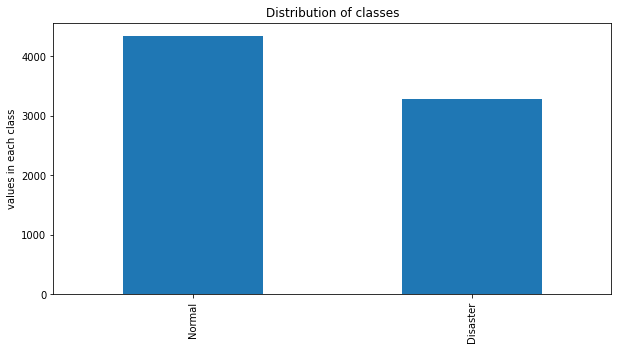

In [17]:
plt.figure(figsize=(10,5))
data_train['target'].value_counts().plot(kind= 'bar')
plt.xticks([0,1],["Normal","Disaster"])
plt.ylabel("values in each class")
plt.title("Distribution of classes")
plt.show()

- number of zeros : 4342
- number of ones : 3271
--------



we will drop the ID column. First

## Dropping  id column

In [18]:
data_train.drop('id',axis=1,inplace=True )
data_train.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [19]:
data_test.drop("id",axis=1 ,inplace = True)
data_test.head()

,keyword,location,text
0,NaN,NaN,Just happened a terrible car crash
1,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Common and top data 

cleaning every column is very important 

In [20]:
#showing location column with lower case
def clean_column(data,column):
    data[column].fillna("data will be filled out with something valueble",inplace=True)
   
    new_column = []
    for i in data_train[column]:
        tweet = i
        tweet =re.sub(r'\W|_',' ',tweet)    
        tweet = tweet.lower()
        new_column.append(tweet)
    data[column] = new_column
    return data
new_data_train = clean_column(data_train,'location')
new_data_train = clean_column(data_train,'keyword')
new_data_train.head(40)

,keyword,location,text,target
0,data will be filled out with something valueble,data will be filled out with something valueble,Our Deeds are the Reason of this #earthquake M...,1
1,data will be filled out with something valueble,data will be filled out with something valueble,Forest fire near La Ronge Sask. Canada,1
2,data will be filled out with something valueble,data will be filled out with something valueble,All residents asked to 'shelter in place' are ...,1
3,data will be filled out with something valueble,data will be filled out with something valueble,"13,000 people receive #wildfires evacuation or...",1
4,data will be filled out with something valueble,data will be filled out with something valueble,Just got sent this photo from Ruby #Alaska as ...,1
5,data will be filled out with something valueble,data will be filled out with something valueble,#RockyFire Update => California Hwy. 20 closed...,1
6,data will be filled out with something valueble,data will be filled out with something valueble,#flood #disaster Heavy rain causes flash flood...,1
7,data will be filled out with something valueble,data will be filled out with something valueble,I'm on top of the hill and I can see a fire in...,1
8,data will be filled out with something valueble,data will be filled out with something valueble,There's an emergency evacuation happening now ...,1
9,data will be filled out with something valueble,data will be filled out with something valueble,I'm afraid that the tornado is coming to our a...,1


In [21]:
def analyze_words(data,column):
    area_code = []
    needs_filtering = []
    safe = []
    null_value =  []
    for tweet in data[column]: 
        words =re.findall(r'\D+',tweet)
        numbers = re.findall(r'\d+',tweet)
        if len(words) == 0:
            area_code.append(tweet)
        elif len(numbers)>0:
            needs_filtering.append(tweet)
        elif tweet == "data will be filled out with something valueble":
            null_value.append(tweet)
        else: 
            safe.append(tweet)
    return area_code,needs_filtering ,safe,null_value
area_code,needs_filtering ,safe ,null_value= analyze_words(data_train,'location')

In [22]:
print("Area code")
print(len(area_code))
print('needs_filtering')
print(len(needs_filtering))
print("safe")
print(len(safe))
print("null")
print(len(null_value))

Area code
24
needs_filtering
210
safe
4846
null
2533


As we know that there is no location with a stop word except "in"

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
uncleaned = []
cleaned = [] 
for i in safe:
    flag = False
    for j in stop_words :
        if j in i.split(" ") and (j!='d') and (j !="i") and (j!="the") and(j!='d') :
            flag = True
            
    if flag ==True:
        uncleaned.append(i)
    else:
        cleaned.append(i)

We will start changing the city codes with their real name 

In [26]:
def get_city_codes(lista):
    city_codes= [] 
    for letter in lista:
        letter_list= letter.split(" ")
        for word in letter_list:
            if len(word) == 2:
                city_codes.append(word)
    return city_codes
city_codes  = get_city_codes(cleaned)

In [27]:
len(city_codes)

1226

In [28]:
df_citycodes = pd.DataFrame({"City Codes":city_codes})
df_citycodes.head(10)

,City Codes
0,pa
1,uk
2,ca
3,ab
4,tn
5,ca
6,uk
7,st
8,mo
9,ca


In [29]:
df_citycodes['City Codes'].unique()

array(['pa', 'uk', 'ca', 'ab', 'tn', 'st', 'mo', 'tx', 'oh', 'nc', 'nh',
       'la', 'md', 'us', 'ig', 'vt', 'mi', 'ny', 'sc', 'az', 'sp', 'dc',
       'wi', 'ûê', 'fl', 'ss', 'bi', 'ex', 'sf', 'il', 'wa', 'ne', 'ph',
       'se', 'co', 'va', 'ga', 'de', 'ms', 'al', 'bc', 'hi', 'mn', 'oc',
       'nv', 'ia', 'dì', 'ri', 'ks', 'es', 'el', 'tu', 'ct', 'nj', 'af',
       'go', 'bb', 'ok', 'ge', 'ad', 'ic', 'ut', 'kc', 'ar', 'bk', 'en',
       'mì', 'im', 'di', 'sd', 'tv', 'ru', 'py', 'tì', 'pe', 'nz', 'pr',
       'ak', 'åø', 'fd', 'kì', 'ln', 'pg', 'na', 'nm', 'id', 'rp', 'nt',
       'ûó', 'si', 'hs', 'åá', 'ky', 'nd', 'le', 'wy', 'ce', 'ku', 'ìñ',
       'wv', 'lì', 'eh', 'lp', 'tw', 'hp', 'mv', 'mb', 'ya', 'au', 'ns',
       'nf', 'qz', 'åê', 'lo', 'mt'], dtype=object)

In [30]:
City_names =["Pennsylvania",'United Kingdom',
             "California",'Tennessee','Missouri City',
             'Texas City','Ohio','North Carolina',
             'New Hampshire','Los Angeles','usa','Vermont',
             'New York City','South Carolina','Arizona City',
             'Washington D.C.','Wisconsin','Florida City',
             'San Francisco','Illinois','Washington','Nebraska'
             ,'Port Harcourt','Sweden',"colorado",'Virginia','Georgia','Delaware'
             ,'Mississippi','Alabama','British Columbia','Minnesota',
             'Orange County','Nevada City, California','Rhode Island',
             'Kansas City','Dublin','Connecticut','New Jersey',
             'Oklahoma City','Utah','Kansas City, Missouri',
             'San Diego City','Russia','Port Elizabeth','new zealand'
             ,'Paso Robles','Alaska','Pleasant Grove City','New Mexico',
             'Australia','Kentucky','North Dakota','Wyoming','West Virginia'
             ,'Edinburgh','Taipei City','Australia','Nova Scotia',
            'Niagara Falls','Quezon City','Montana'
            ]

In [31]:
not_countries = ['ab','st','ig','mi','sp','ûê','åê','di','es','el','åø'
                 ,'af','go','bb','ge','ad','ic','ar'
                ,'bk','en','mì','im','di','tì',
                 'tv','py','fd','kì','ln','na','id','ûó','si','hs','åá','le','ce','ku','ìñ','lì'
                ,'lp','hp','mv','mb','ya','lo','md','ex','rp','dì','ia','hi','ss','bi'] 

In [32]:
city_codes1= []
for i in df_citycodes["City Codes"]:
    if i not in not_countries:
        city_codes1.append(i)
    else:
        city_codes1.append("not_country")
df_citycodes["City Codes"]= city_codes1

In [33]:
print(df_citycodes["City Codes"].unique())

['pa' 'uk' 'ca' 'not_country' 'tn' 'mo' 'tx' 'oh' 'nc' 'nh' 'la' 'us' 'vt'
 'ny' 'sc' 'az' 'dc' 'wi' 'fl' 'sf' 'il' 'wa' 'ne' 'ph' 'se' 'co' 'va'
 'ga' 'de' 'ms' 'al' 'bc' 'mn' 'oc' 'nv' 'ri' 'ks' 'tu' 'ct' 'nj' 'ok'
 'ut' 'kc' 'sd' 'ru' 'pe' 'nz' 'pr' 'ak' 'pg' 'nm' 'nt' 'ky' 'nd' 'wy'
 'wv' 'eh' 'tw' 'au' 'ns' 'nf' 'qz' 'mt']


In [34]:
print(City_names)

['Pennsylvania', 'United Kingdom', 'California', 'Tennessee', 'Missouri City', 'Texas City', 'Ohio', 'North Carolina', 'New Hampshire', 'Los Angeles', 'usa', 'Vermont', 'New York City', 'South Carolina', 'Arizona City', 'Washington D.C.', 'Wisconsin', 'Florida City', 'San Francisco', 'Illinois', 'Washington', 'Nebraska', 'Port Harcourt', 'Sweden', 'colorado', 'Virginia', 'Georgia', 'Delaware', 'Mississippi', 'Alabama', 'British Columbia', 'Minnesota', 'Orange County', 'Nevada City, California', 'Rhode Island', 'Kansas City', 'Dublin', 'Connecticut', 'New Jersey', 'Oklahoma City', 'Utah', 'Kansas City, Missouri', 'San Diego City', 'Russia', 'Port Elizabeth', 'new zealand', 'Paso Robles', 'Alaska', 'Pleasant Grove City', 'New Mexico', 'Australia', 'Kentucky', 'North Dakota', 'Wyoming', 'West Virginia', 'Edinburgh', 'Taipei City', 'Australia', 'Nova Scotia', 'Niagara Falls', 'Quezon City', 'Montana']


In [35]:
len(df_citycodes["City Codes"].unique())

63

In [36]:
len(City_names)

62

In [37]:
unique = df_citycodes["City Codes"].unique()

In [38]:
City_names.insert(3,"not_country")


In [39]:
rep = {}
for i in range(len(City_names)) :
    rep[unique[i]] = City_names[i].lower()


In [40]:
cleaned_copy = cleaned.copy()

In [41]:
newCleaned_copy = []
listb = []

lista = listb
for letter in cleaned_copy:
    flag = False


    for i in range(len(unique)):
        
        if unique[i] in letter.split(" ") :
            
            tweet = re.sub(unique[i],rep[unique[i]],letter)    
            tweet = re.sub("  ",' ',tweet )
            newCleaned_copy.append(tweet)
            
            flag = True
    if not flag:
        letter = re.sub("  ",' ',letter )
        newCleaned_copy.append(letter)
            

Now remove the duplicates in each loaction

In [42]:
def remove_duplicates(listc):
    lista = []
    for letter in listc :
        listb = [] 
        for word in letter.split(" "):
            if word not in listb:
                listb.append(word)
        lista.append(" ".join(listb))
    return(lista)
lista =  remove_duplicates(newCleaned_copy)

In [43]:
count_words = {}
for i in lista:
    
    words = i.split(" ")
    for j in words:
        if j not in count_words:
            count_words[str(j)] = 1
        else:
            count_words[str(j)]+=1


In [44]:
frequent_words = {}
for i in count_words:
    if count_words[i]>9 and i != "" and i!= " " and i!='c' and i!= 'd' and i!='com' and i!="ss" and i!= "everywhere" and i!='ab' and i!="world":
        frequent_words[i] =count_words[i] 
print(frequent_words)

{'birmingham': 12, 'africa': 26, 'philadelphia': 11, 'pennsylvania': 50, 'london': 112, 'united': 183, 'kingdom': 123, 'city': 311, 'north': 87, 'carolina': 77, 'england': 68, 'ohio': 44, 'india': 50, 'usa': 274, 'south': 59, 'california': 234, 'calgary': 23, 'san': 79, 'francisco': 37, 'nashville': 14, 'tennessee': 44, 'st': 27, 'louis': 12, 'missouri': 23, 'county': 23, 'alabama': 20, 'australia': 64, 'kenya': 34, 'texas': 111, 'new': 288, 'manchester': 24, 'hampshire': 14, 'global': 17, 'alberta': 18, 'charlotte': 20, 'los': 76, 'angeles': 73, 'md': 17, 'nairobi': 13, 'canada': 79, 'oregon': 23, 'states': 60, 'beach': 20, 'indonesia': 22, 'mumbai': 33, 'valley': 11, 'nyc': 33, 'toronto': 24, 'york': 183, 'worldwide': 43, 'west': 27, 'wales': 15, 'arizona': 30, 'colorado': 51, 'germany': 13, 'mi': 23, 'boston': 12, 'the': 76, 'phoenix': 10, 'connecticut': 14, 'washington': 101, 'houston': 22, 'denver': 21, 'austin': 17, 'argentina': 10, 'las': 13, 'vegas': 14, 'florida': 86, 'east': 

In [45]:
## making the data better
newCleaned_copy = []
listb = []
area_dict = {"304":"west virgina","302":"delaware","316":"Kansas","956":"texas","253":"tacoma","518":"new york city"}
for letter in data_train["location"]:
    flag = False

    for i in area_dict:
        
        if i in letter.split(" ") :
            
            tweet = re.sub(i,area_dict[i],letter)    
            tweet = re.sub("  ",' ',tweet )
            
            
            flag = True
    for i in range(len(unique)):
        if unique[i] in letter.split(" ") :
            
            tweet = re.sub(unique[i],rep[unique[i]],letter)    
            tweet = re.sub("  ",' ',tweet )

            
            flag = True
    if not flag:
        letter = re.sub("  ",' ',letter )
        newCleaned_copy.append(letter)
    else:
        newCleaned_copy.append(tweet)
data_train["location"] = newCleaned_copy

In [46]:
making_fun = []
for i in data_train["location"]:
    flag = False
    for j in stop_words :
        if j in i.split(" ")  and (j!="the") and (j!="of") and (i!="data will be filled out with something valueble") :
            flag = True
            
    if flag ==True:
        making_fun.append(1)
    else:
        making_fun.append(0)
data_train["making_fun"] = making_fun 

In [47]:
lista = [] 
for letter in data_train["location"] :
    listb = [] 
    for word in letter.split(" "):
        if word not in listb and word!=" ":
            listb.append(word)
    lista.append(" ".join(listb))



#plan of attak
1. replace the names in lists with name in list with names in frequent words 
2. see the most replicated places
3. place then most and least typed places as two features
4. replace the words like ATl with atlanta georgia, nyc with new york city and usa with united states of america
5. compare between the top 15 places

In [48]:
lista = []
count_words = {}
for letter in data_train["location"]:
    words = letter.split(" ")
    for i in range(len(words)):
        if i!=0:
            commonwords  = str(words[i-1]) +" "+ (str(words[i]))
            if commonwords not in count_words :
                count_words[commonwords] = 1
            else :
                count_words[commonwords] += 1


In [49]:
cities = {}
for city in count_words:
    if count_words[city] >8 and city!= "c " and city!="å "and city!="a " and city!="to the" and city!="co " and city != " co"  and city!="of the"  :
        cities[city] = count_words[city]
print(cities)

{'data will': 2533, 'will be': 2533, 'be filled': 2533, 'filled out': 2533, 'out with': 2533, 'with something': 2533, 'something valueble': 2533, 'philadelphia pennsylvania': 9, 'london united': 16, 'united kingdom': 126, 'north carolina': 62, 'south africa': 20, 'calgary ab': 10, 'san francisco': 36, 'nashville tennessee': 12, 'st louis': 10, 'missouri city': 16, 'texas city': 64, 'new hampshire': 13, 'los angeles': 73, 'nairobi kenya': 9, 'west virgina': 9, 'united states': 62, 'california ': 12, 'florida city': 54, 'u s': 16, 'francisco california': 11, 'new york': 217, ' ': 358, 'york new': 21, 'york city': 90, 'û ': 9, 'city new': 9, 'california usa': 24, 'nevada city,': 11, 'city, california': 11, 'south carolina': 13, 'arizona city': 20, 'austin texas': 13, 'las vegas': 12, 'washington washington': 30, 'washington d.c.': 40, 'charlotte north': 10, 'angeles california': 32, 'bay area': 10, 'dallas texas': 11, 'seattle washington': 14, 'london ': 9, 's a': 13, 'new jersey': 48, 'd

In [50]:
#replacing city abreviation
# and removing stopwords
lista = []
for letter in data_train["location"] :
    word  = ''
    for i in letter.split(" "):
        if i =="atl":
            word +="atlanta georgia "
        elif i =="nyc":
            word = "new york "
        elif len(i) ==1:
            word += ""
        elif i =="usa":
            word += "united states "

        elif i in stop_words:
            word += ""

        else :
            word+= i + " "
    lista.append(word)

# removing unnecessary spaces 
listb = []
for letter in lista:
    letter = re.sub("  ", " ",letter)

    if len(letter) != 0 :
            if letter[-1] == " ":
                letter = letter[:-1]
            if len(letter) != 0 :
                if letter[0] == " ":
                    letter = letter[1:]
    
    listb.append(letter)
data_train["location"] = remove_duplicates(listb)


In [51]:
listb=[]
for letter in data_train["location"]:
    
    flag = False
    
    a = ""
    for j in cities:
        
        if j in letter:
            a += j + " "
            flag = True
    for j in frequent_words:
        if j in letter: 
            a +=j +" "
            flag =True
    if not flag:
        a = "uncommon places"
    listb.append(a)
listb = remove_duplicates(listb)

lista = []
for letter in listb:
    letter = re.sub("  ", " ",letter)

    if len(letter) != 0 :
            if letter[-1] == " ":
                letter = letter[:-1]
            if len(letter) != 0 :
                if letter[0] == " ":
                    letter = letter[1:]
    lista.append(letter)
    
data_train["location"] = remove_duplicates(lista)

In [52]:
#replacing city abreviation
# and removing stopwords
lista = []
for letter in data_train["location"] :
    word  = ''
    for i in letter.split(" "):
        if i =="atl":
            word +="atlanta georgia "
        elif i =="nyc":
            word = "new york "
        elif len(i) ==1:
            word += ""
        elif i =="usa":
            word += "united states "

        elif i in stop_words:
            word += ""

        else :
            word+= i + " "
    lista.append(word)

# removing unnecessary spaces 
listb = []
for letter in lista:
    letter = re.sub("  ", " ",letter)

    if len(letter) != 0 :
            if letter[-1] == " ":
                letter = letter[:-1]
            if len(letter) != 0 :
                if letter[0] == " ":
                    letter = letter[1:]
    
    listb.append(letter)
data_train["location"] = remove_duplicates(listb)


## highest 15 locations with one word

In [53]:
def most_freq(lista):
    count_words = {}
    for i in lista:
    
        words = i.split(" ")
        for j in words:
            if j not in count_words:
                count_words[str(j)] = 1
            else:
                count_words[str(j)]+=1

    frequent_words = {}
    for i in count_words:
     
        if count_words[i]>12 and i!="area" and i!="las" and i!="san" and i!= "east"and i!="los" and i!="city" and i!= "west" and  i!= "st" and  i!="south" and i!="":
            frequent_words[i] =count_words[i] 
    return frequent_words

print(sorted(most_freq(data_train["location"]).items(), key=lambda item: item[1],reverse =True))
locations = most_freq(data_train["location"])

[('something', 2533), ('valueble', 2533), ('uncommon', 794), ('places', 794), ('united', 477), ('state', 374), ('new', 358), ('states', 351), ('california', 238), ('york', 226), ('mi', 205), ('kingdom', 128), ('texas', 123), ('london', 117), ('washington', 104), ('north', 100), ('florida', 93), ('canada', 85), ('carolina', 78), ('angeles', 73), ('england', 71), ('australia', 68), ('india', 67), ('georgia', 61), ('nigeria', 61), ('illinois', 57), ('jersey', 57), ('colorado', 54), ('port', 54), ('pennsylvania', 53), ('chicago', 49), ('virginia', 47), ('worldwide', 46), ('tennessee', 45), ('ohio', 44), ('d.c.', 39), ('atlanta', 38), ('francisco', 37), ('columbia', 37), ('british', 35), ('kenya', 34), ('mumbai', 33), ('earth', 33), ('africa', 29), ('toronto', 29), ('arizona', 29), ('county', 28), ('seattle', 28), ('ontario', 28), ('oregon', 26), ('kansas', 26), ('manchester', 25), ('ireland', 25), ('oklahoma', 25), ('diego', 25), ('calgary', 23), ('sydney', 23), ('louis', 22), ('missouri',

In [54]:
lista = []
count = {}
for letter in data_train["location"]:
    words = letter.split(" ")
    for i in range(len(words)):
        if i!=0:
            commonwords  = str(words[i-1]) +" "+ (str(words[i]))
            if commonwords not in count :
                count[commonwords] = 1
            else :
                count[commonwords] += 1
cities = {}
for city in count:
    if (count[city] >=10 and city!= "st mi" and city!="st west" and
    city!="st state" and city!="city mi" and city!="south st"
    and city!="st new" and city!="st pakistan" and city!="states st" 
    and city!= "c " and city!="å "and city!="a " and city!="to the"
    and city!="co " and city != " co"  and city!="of the"
    and city!="california st" and city!="england st" and city!="st manchester" and city!="pennsylvania st" 
    and city!="st boston" and city!="london united" and city!="city st" and city!="st australiat" 
    and city!="denver colorado" and city!="chicago illinois" and city!="'st east" 
    and city!="st australia"  and city!="st east" and city!="north st" ):
        cities[city] = count[city]


print(sorted(cities.items(), key=lambda item: item[1],reverse =True))

[('something valueble', 2533), ('uncommon places', 794), ('united states', 348), ('new york', 221), ('united kingdom', 126), ('york city', 85), ('los angeles', 73), ('texas city', 64), ('north carolina', 62), ('florida city', 54), ('new jersey', 46), ('washington d.c.', 39), ('san francisco', 36), ('british columbia', 34), ('states california', 31), ('angeles california', 31), ('atlanta georgia', 28), ('san diego', 25), ('south africa', 21), ('arizona city', 20), ('kansas city', 16), ('oklahoma city', 15), ('seattle washington', 14), ('nashville tennessee', 13), ('new hampshire', 13), ('francisco california', 13), ('south carolina', 13), ('mi miami', 13), ('vancouver british', 13), ('new newcastle', 13), ('california san', 12), ('missouri city', 12), ('kingdom st', 12), ('las vegas', 12), ('london england', 12), ('india indiana', 12), ('mi state', 12), ('city houston', 12), ('houston st', 12), ('st louis', 11), ('nevada city,', 11), ('diego california', 11), ('sacramento california', 1

# top 15 locations  
1. united states
2. california
3. new york city
4. united kingdom
5. texas
6. london
7. washington
8. florida
9. canada
10. los angeles
11. england
12. australia
13. india
14. north calorina
15. georgia


## working on keywords

In [55]:
lista = []
for letter in data_train["location"]:
    falg  = False
    words = []
    tweet= ""
    for location in locations :
        if location in letter:
            words.append(location)
    for i in range(len(words)):
        if i!= 0:
            if locations[words[i]]>locations[words[i-1]]:
                tweet = words[i-1]
            else:
                tweet = words[i]  
    words = []
    
    for city in cities:
        if city in letter:
            words.append(city)
    for i in range(len(words)):
        if i!= 0:
            if cities[words[i]]>cities[words[i-1]]:
                tweet = words[i-1]
            else:
                tweet = words[i]
    if letter  == "something valueble" or letter == "uncommon places":
        tweet = letter
    if letter  == '':
        tweet = "making fun"
    if tweet =="":
        tweet = "undefined"
        
    lista.append(tweet)
data_train["location"] = lista


In [56]:
lista = []
for letter in data_train["keyword"]:
    letter +=" "
    lista.append(letter)
data_train["keyword"] = lista

In [57]:
data_train['keyword'].unique()

array(['data will be filled out with something valueble ', 'ablaze ',
       'accident ', 'aftershock ', 'airplane 20accident ', 'ambulance ',
       'annihilated ', 'annihilation ', 'apocalypse ', 'armageddon ',
       'army ', 'arson ', 'arsonist ', 'attack ', 'attacked ',
       'avalanche ', 'battle ', 'bioterror ', 'bioterrorism ', 'blaze ',
       'blazing ', 'bleeding ', 'blew 20up ', 'blight ', 'blizzard ',
       'blood ', 'bloody ', 'blown 20up ', 'body 20bag ',
       'body 20bagging ', 'body 20bags ', 'bomb ', 'bombed ', 'bombing ',
       'bridge 20collapse ', 'buildings 20burning ',
       'buildings 20on 20fire ', 'burned ', 'burning ',
       'burning 20buildings ', 'bush 20fires ', 'casualties ',
       'casualty ', 'catastrophe ', 'catastrophic ',
       'chemical 20emergency ', 'cliff 20fall ', 'collapse ',
       'collapsed ', 'collide ', 'collided ', 'collision ', 'crash ',
       'crashed ', 'crush ', 'crushed ', 'curfew ', 'cyclone ', 'damage ',
       'danger ',

In [58]:
lista  = [] 
for letter in data_train["keyword"]:
    
    if letter[-1] == " ":
        letter = letter[:-1]
    lista.append(letter)
data_train["keyword"] = lista

In [59]:
ps = PorterStemmer()
lista = [] 
for letter in data_train["keyword"]:
    tweet_clean = ""
    listb= []
    for word in letter.split(" "):
        word=ps.stem(word) 

        listb.append(word)
    
    for i in listb:
        tweet_clean += i + " "
    lista.append(tweet_clean)
data_train["keyword"] = lista

In [60]:
data_train["keyword"].unique()

array(['data will be fill out with someth valuebl ', 'ablaz ', 'accid ',
       'aftershock ', 'airplan 20accid ', 'ambul ', 'annihil ',
       'apocalyps ', 'armageddon ', 'armi ', 'arson ', 'arsonist ',
       'attack ', 'avalanch ', 'battl ', 'bioterror ', 'blaze ', 'bleed ',
       'blew 20up ', 'blight ', 'blizzard ', 'blood ', 'bloodi ',
       'blown 20up ', 'bodi 20bag ', 'bomb ', 'bridg 20collaps ',
       'build 20burn ', 'build 20on 20fire ', 'burn ', 'burn 20build ',
       'bush 20fire ', 'casualti ', 'catastroph ', 'chemic 20emerg ',
       'cliff 20fall ', 'collaps ', 'collid ', 'collis ', 'crash ',
       'crush ', 'curfew ', 'cyclon ', 'damag ', 'danger ', 'dead ',
       'death ', 'debri ', 'delug ', 'demolish ', 'demolit ', 'derail ',
       'desol ', 'destroy ', 'destruct ', 'deton ', 'devast ', 'disast ',
       'displac ', 'drought ', 'drown ', 'dust 20storm ', 'earthquak ',
       'electrocut ', 'emerg ', 'emerg 20plan ', 'emerg 20servic ',
       'engulf ', 'epi

In [61]:
def remove_digits(lista):
    listb = []
    for letter in  lista :
        letter = re.sub("\d",'',letter)
        listb.append(letter)
    return listb
data_train['keyword'] = remove_digits(data_train['keyword'])

In [62]:
data_train['keyword'].unique()

array(['data will be fill out with someth valuebl ', 'ablaz ', 'accid ',
       'aftershock ', 'airplan accid ', 'ambul ', 'annihil ',
       'apocalyps ', 'armageddon ', 'armi ', 'arson ', 'arsonist ',
       'attack ', 'avalanch ', 'battl ', 'bioterror ', 'blaze ', 'bleed ',
       'blew up ', 'blight ', 'blizzard ', 'blood ', 'bloodi ',
       'blown up ', 'bodi bag ', 'bomb ', 'bridg collaps ', 'build burn ',
       'build on fire ', 'burn ', 'burn build ', 'bush fire ',
       'casualti ', 'catastroph ', 'chemic emerg ', 'cliff fall ',
       'collaps ', 'collid ', 'collis ', 'crash ', 'crush ', 'curfew ',
       'cyclon ', 'damag ', 'danger ', 'dead ', 'death ', 'debri ',
       'delug ', 'demolish ', 'demolit ', 'derail ', 'desol ', 'destroy ',
       'destruct ', 'deton ', 'devast ', 'disast ', 'displac ',
       'drought ', 'drown ', 'dust storm ', 'earthquak ', 'electrocut ',
       'emerg ', 'emerg plan ', 'emerg servic ', 'engulf ', 'epicentr ',
       'evacu ', 'explod ', 

In [63]:
#subsitute some keywords
lista = []
for letter in data_train["keyword"]:
    letter = re.sub("wildfir", 'wild fire', letter)
    letter = re.sub("wreckag", 'wreck', letter)
    letter = re.sub("injuri", 'injur', letter)
    letter = re.sub("panick", 'panic', letter)
    letter = re.sub("blown up", 'blew up', letter)
    letter = re.sub("bloodi", 'blood', letter)
    letter = re.sub("collis",'collid',letter)
    letter = re.sub("rescuer",'rescu',letter)
    letter = re.sub("survivor",'surviv',letter)
    letter = re.sub("terrorist",'terror',letter)
    letter = re.sub("traumatis",'trauma',letter)
    letter = re.sub("explos",'explod',letter)
    letter = re.sub("build burn",'burn build',letter)

    lista.append(letter)
data_train['keyword'] = lista


In [64]:
def count_top(lista):
    top = {}
    for  letter in  lista:
        if letter not in top:
            top[letter] = 1
        else:
            top[letter] += 1
    return sorted(top.items(), key=lambda item: item[1],reverse =True)
print(count_top(data_train["keyword"]))


[('fatal ', 120), ('wreck ', 115), ('collid ', 113), ('derail ', 112), ('evacu ', 112), ('explod ', 110), ('flood ', 109), ('bodi bag ', 107), ('injur ', 106), ('scream ', 105), ('drown ', 104), ('bomb ', 101), ('hijack ', 100), ('surviv ', 95), ('rescu ', 92), ('obliter ', 91), ('weapon ', 78), ('death ', 74), ('blaze ', 72), ('burn build ', 72), ('attack ', 71), ('quarantin ', 71), ('blood ', 70), ('panic ', 70), ('wound ', 70), ('casualti ', 69), ('collaps ', 69), ('delug ', 69), ('destroy ', 69), ('hazard ', 69), ('riot ', 69), ('siren ', 69), ('crush ', 68), ('deton ', 68), ('hostag ', 68), ('suicid bomb ', 68), ('bioterror ', 67), ('burn ', 67), ('crash ', 67), ('devast ', 67), ('blew up ', 66), ('catastroph ', 66), ('electrocut ', 66), ('trauma ', 66), ('desol ', 65), ('mass murder ', 65), ('terror ', 65), ('wild fire ', 64), ('annihil ', 63), ('demolish ', 62), ('data will be fill out with someth valuebl ', 61), ('forest fire ', 51), ('inund ', 45), ('armageddon ', 42), ('damag

##  top 15 keywords
1. fatal
2. wreck 
3. collid
4. derail
5. evacu
6. explod
7. flood
8. bodi bag
9. injur
10. scream
11. drown
12. bomb
13. hijack
14. surviv
15. rescu

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [65]:
lista = [] 
for letter in data_train["text"]:
    letter = re.sub(r"@[a-zA-Z0-9|_]+","",letter)
    letter = re.sub("\d",' number ',letter)
    letter = re.sub(r"http://[a-zA-Z0-9|_./]+","",letter)
    letter = re.sub(r"https://[a-zA-Z0-9|_./]+","",letter)    
    letter = re.findall(r"[a-zA-Z0-9]+",letter)
    lista.append(letter)


In [66]:
lower_lista = []
for letter in lista:
    listb = []
    for i in letter:
        i = i.lower()
        listb.append(i)
    lower_lista.append(listb) 


In [67]:
lower_lista

def common_words(lista, flag= False):
    common_word = {}
    for letter in lista:
        for i in letter:
            if  i not in common_word and flag ==  False:
                common_word[i] = 1
            elif  i not in common_word and flag ==  True and i not in stop_words:
                common_word[i] = 1
            elif flag ==  True and i in stop_words:
                continue
            else:
                common_word[i] +=1
    return sorted(common_word.items(), key=lambda item: item[1],reverse =True)
print(common_words(lower_lista))

[('number', 14664), ('the', 3283), ('a', 2286), ('in', 1990), ('to', 1950), ('i', 1850), ('of', 1830), ('and', 1427), ('s', 1068), ('is', 951), ('you', 905), ('for', 896), ('on', 863), ('it', 780), ('my', 681), ('that', 625), ('with', 574), ('t', 572), ('at', 543), ('by', 531), ('this', 480), ('from', 422), ('be', 414), ('are', 405), ('m', 396), ('was', 386), ('have', 386), ('like', 348), ('amp', 344), ('as', 333), ('up', 331), ('me', 331), ('just', 323), ('but', 323), ('so', 318), ('we', 301), ('not', 299), ('your', 293), ('out', 273), ('all', 268), ('no', 268), ('after', 260), ('will', 258), ('an', 255), ('when', 255), ('fire', 254), ('can', 254), ('has', 250), ('if', 244), ('he', 242), ('they', 231), ('get', 229), ('new', 227), ('now', 225), ('what', 224), ('via', 220), ('more', 218), ('about', 214), ('news', 209), ('or', 207), ('people', 199), ('one', 199), ('how', 193), ('don', 192), ('been', 191), ('who', 190), ('over', 190), ('there', 189), ('u', 188), ('into', 174), ('do', 174)

# Top common words  with stop words
1. the 
2. a 
3. in 
4. to
5. i 
6. of
7. and 
8. 's
9. is 
10. you 
11. on
12. it
13. my 
14. that
15. with

In [68]:
print(common_words(lower_lista,flag = True))
common_words(lower_lista,flag = True)

[('number', 14664), ('like', 348), ('amp', 344), ('fire', 254), ('get', 229), ('new', 227), ('via', 220), ('news', 209), ('people', 199), ('one', 199), ('u', 188), ('video', 165), ('disaster', 158), ('emergency', 158), ('w', 158), ('police', 143), ('would', 137), ('body', 131), ('time', 130), ('still', 129), ('us', 128), ('california', 121), ('storm', 121), ('burning', 121), ('day', 120), ('back', 120), ('crash', 119), ('suicide', 119), ('man', 117), ('got', 114), ('p', 114), ('rt', 113), ('know', 113), ('x', 112), ('r', 111), ('buildings', 111), ('first', 109), ('pm', 109), ('c', 107), ('b', 106), ('world', 106), ('see', 105), ('bomb', 105), ('going', 104), ('nuclear', 104), ('two', 103), ('go', 103), ('love', 102), ('fires', 102), ('attack', 101), ('today', 100), ('killed', 99), ('dead', 98), ('year', 98), ('gt', 95), ('hiroshima', 95), ('car', 94), ('full', 94), ('train', 93), ('old', 93), ('n', 92), ('life', 92), ('war', 92), ('e', 90), ('let', 90), ('accident', 89), ('good', 89), 

[('number', 14664),
 ('like', 348),
 ('amp', 344),
 ('fire', 254),
 ('get', 229),
 ('new', 227),
 ('via', 220),
 ('news', 209),
 ('people', 199),
 ('one', 199),
 ('u', 188),
 ('video', 165),
 ('disaster', 158),
 ('emergency', 158),
 ('w', 158),
 ('police', 143),
 ('would', 137),
 ('body', 131),
 ('time', 130),
 ('still', 129),
 ('us', 128),
 ('california', 121),
 ('storm', 121),
 ('burning', 121),
 ('day', 120),
 ('back', 120),
 ('crash', 119),
 ('suicide', 119),
 ('man', 117),
 ('got', 114),
 ('p', 114),
 ('rt', 113),
 ('know', 113),
 ('x', 112),
 ('r', 111),
 ('buildings', 111),
 ('first', 109),
 ('pm', 109),
 ('c', 107),
 ('b', 106),
 ('world', 106),
 ('see', 105),
 ('bomb', 105),
 ('going', 104),
 ('nuclear', 104),
 ('two', 103),
 ('go', 103),
 ('love', 102),
 ('fires', 102),
 ('attack', 101),
 ('today', 100),
 ('killed', 99),
 ('dead', 98),
 ('year', 98),
 ('gt', 95),
 ('hiroshima', 95),
 ('car', 94),
 ('full', 94),
 ('train', 93),
 ('old', 93),
 ('n', 92),
 ('life', 92),
 ('war',

## top 15 common words with no stop word
1. like
2. amp
3. fire
4. get
5. new 
6. via
7. news
8. people
9. one 
10. u
11. video
12. disaster
13. emergency
14. w 
15. police


@@@@@@@@@@@
##for more if not u and w 


16. would
17. body


## putting more features

### adding  length column

In [69]:
lista = []
for i in  data_train['text']:
    lista.append(len(i.split(" ")))
data_train["length"] = lista

In [70]:
data_train.head()

,keyword,location,text,target,making_fun,length
0,data will be fill out with someth valuebl,something valueble,Our Deeds are the Reason of this #earthquake M...,1,0,13
1,data will be fill out with someth valuebl,something valueble,Forest fire near La Ronge Sask. Canada,1,0,7
2,data will be fill out with someth valuebl,something valueble,All residents asked to 'shelter in place' are ...,1,0,22
3,data will be fill out with someth valuebl,something valueble,"13,000 people receive #wildfires evacuation or...",1,0,9
4,data will be fill out with someth valuebl,something valueble,Just got sent this photo from Ruby #Alaska as ...,1,0,17


In [71]:
lista = [] 
for letter in data_train["text"]:
    letter = re.sub(r"@[a-zA-Z0-9|_]+","",letter)
    letter = re.sub("\d",' number ',letter)
    letter = re.sub(r"http://[a-zA-Z0-9|_./]+","",letter)
    letter = re.sub(r"https://[a-zA-Z0-9|_./]+","",letter)
    letter = re.findall(r"[a-zA-Z0-9]+",letter)
    lista.append(letter)


### adding a column representing number of columns

In [72]:
lista = []

for letter in data_train['text']:
    count = 0
    letter = re.findall(r"[a-zA-Z0-9]+",letter)
    for i in letter:
        if i[0] ==i[0].upper():
            count +=1
    lista.append(count)
data_train["capitals"] = lista

## cleaning the text columns

In [73]:
lista = [] 
for letter in data_train["text"]:
    letter = re.sub(r"@[a-zA-Z0-9|_]+","",letter)
    letter = re.sub("\d",' number ',letter)
    letter = re.sub(r"http://[a-zA-Z0-9|_/]+","",letter)
    letter = re.sub(r"https://[a-zA-Z0-9|_/]+","",letter)
    letter = letter.lower()
    lista.append(letter)
data_train["text"] = lista

In [74]:
print(lista[:5])

['our deeds are the reason of this #earthquake may allah forgive us all', 'forest fire near la ronge sask. canada', "all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected", ' number  number , number  number  number  people receive #wildfires evacuation orders in california ', 'just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school ']


## subsitute all hashtags with word

In [75]:
lista = []
for letter in data_train["text"]:
    hashtags= re.findall(r"#[a-zA-Z0-9|_/]+",letter)
    letter = re.sub("'",' ',letter)
    re.sub("  ",' ',letter)
    for j in hashtags:
        letter = re.sub(j,j[1:],letter)    
    lista.append(letter)
data_train["text"] = lista

# tokenizing words and creating pad sequece

In [76]:
def clean_text(sentences):
    result=[]
    for sentence in sentences:
        sentence=re.sub(r'\W',' ',sentence)# pattern  # text 
        sentence=sentence.lower()
        result.append(sentence)
        
    return result
training_example=clean_text(data_train["text"])
print(training_example)

['our deeds are the reason of this earthquake may allah forgive us all', 'forest fire near la ronge sask  canada', 'all residents asked to  shelter in place  are being notified by officers  no other evacuation or shelter in place orders are expected', ' number  number   number  number  number  people receive wildfires evacuation orders in california ', 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school ', 'rockyfire update    california hwy   number  number  closed in both directions due to lake county fire   cafire wildfires', 'flood disaster heavy rain causes flash flooding of streets in manitou  colorado springs areas', 'i m on top of the hill and i can see a fire in the woods   ', 'there s an emergency evacuation happening now in the building across the street', 'i m afraid that the tornado is coming to our area   ', 'three people died from the heat wave so far', 'haha south tampa is getting flooded hah  wait a second i live in south tampa what a

In [77]:
training_labels=data_train["target"]
le=LabelEncoder()
le.fit(training_labels)
training_labels=le.fit_transform(training_labels)

In [78]:
training_labels

array([1, 1, 1, ..., 1, 1, 1])

In [79]:
toknizer=Tokenizer(num_words=50000)
toknizer.fit_on_texts(training_example)
sequnces=toknizer.texts_to_sequences(training_example)
print(sequnces)

[[128, 4660, 27, 3, 845, 8, 22, 268, 154, 1591, 4661, 88, 43], [207, 47, 246, 732, 6817, 6818, 1194], [43, 1719, 1592, 6, 1905, 5, 683, 27, 149, 6819, 21, 1720, 42, 391, 269, 62, 1905, 5, 683, 1383, 27, 1079], [1, 1, 1, 1, 1, 64, 4662, 1384, 269, 1383, 5, 97], [35, 110, 1195, 22, 345, 25, 6820, 1906, 32, 283, 25, 1384, 6821, 74, 4, 200], [2942, 392, 97, 1385, 1, 1, 846, 5, 658, 6822, 564, 6, 1130, 413, 47, 4663, 1384], [229, 78, 847, 307, 1196, 811, 270, 8, 1721, 5, 6823, 1017, 2449, 1478], [7, 24, 14, 238, 8, 3, 1907, 9, 7, 48, 120, 4, 47, 5, 3, 4664], [70, 10, 46, 79, 269, 1287, 56, 5, 3, 592, 848, 3, 733], [7, 24, 2450, 17, 3, 525, 11, 261, 6, 128, 276], [565, 64, 636, 25, 3, 284, 456, 37, 637], [849, 544, 2943, 11, 239, 2944, 3622, 684, 4, 638, 7, 214, 5, 544, 2943, 57, 170, 7, 333, 75, 57, 170, 7, 333, 75, 6824, 270], [2945, 270, 1593, 6825, 2943, 1, 1, 62, 1, 1, 566, 7, 186, 709, 4665], [229, 5, 4666, 885, 39, 1722, 4666], [240, 6, 200, 431, 14, 1, 1, 5, 2946, 140, 104, 346], [57

In [80]:
padded_sequence=pad_sequences(sequnces,truncating='post',maxlen=30)
print(padded_sequence)

[[    0     0     0 ...  4661    88    43]
 [    0     0     0 ...  6817  6818  1194]
 [    0     0     0 ...  1383    27  1079]
 ...
 [    0     0     0 ...  6787     1  6788]
 [    0     0     0 ...   147  2029   331]
 [    0     0     0 ... 20065     1    72]]


In [81]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  128 4660   27    3  845    8   22  268  154 1591 4661
   88   43]


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM,Embedding ,GlobalAveragePooling1D

model=Sequential()
model.add(Embedding(50000,10,input_length=30))
model.add(LSTM(10, dropout=0.5, recurrent_dropout=0.5))

model.add(Dense(10,activation='relu'))

model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 10)            500000    
                                                                 
 lstm (LSTM)                 (None, 10)                840       
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 500,961
Trainable params: 500,961
Non-trainable params: 0
_________________________________________________________________


In [83]:
history=model.fit(np.array(padded_sequence),np.array(training_labels),validation_split=0.1,batch_size = 32,epochs=2)

Epoch 1/2
215/215 [==============================] - 58s 239ms/step - loss: 0.6413 - accuracy: 0.6314 - val_loss: 0.5881 - val_accuracy: 0.7047
Epoch 2/2
215/215 [==============================] - 50s 231ms/step - loss: 0.4514 - accuracy: 0.8076 - val_loss: 0.4529 - val_accuracy: 0.7992


___
accurarcy: 8784  
_____
loss : 0.3178
___
val_loss: 0.4578 
___
val_accuracy : 0.7940
___

In [84]:
model.predict([[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0 , 0 ,
              129,4661 ,27 ,3 ,845 ,8,22 ,268 ,154,1591,4662,88,43 ]])

array([[0.44088566]], dtype=float32)

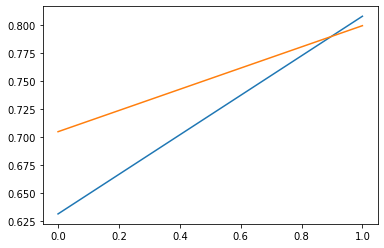

In [85]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

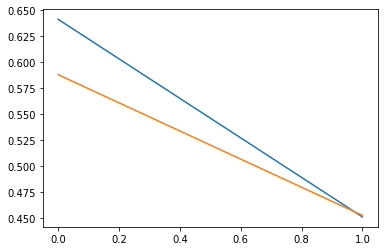

In [86]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

## changing other features to categorical

In [87]:
data_train.head()

,keyword,location,text,target,making_fun,length,capitals
0,data will be fill out with someth valuebl,something valueble,our deeds are the reason of this earthquake ma...,1,0,13,6
1,data will be fill out with someth valuebl,something valueble,forest fire near la ronge sask. canada,1,0,7,5
2,data will be fill out with someth valuebl,something valueble,all residents asked to shelter in place are ...,1,0,22,2
3,data will be fill out with someth valuebl,something valueble,"number number , number number number peop...",1,0,9,3
4,data will be fill out with someth valuebl,something valueble,just got sent this photo from ruby alaska as s...,1,0,17,3


In [88]:
dataset_train = pd.DataFrame( data= (data_train["keyword"],data_train["location"],data_train["length"],data_train["capitals"]) ).T

In [89]:


dataset_train = pd.get_dummies(data = dataset_train,drop_first = True)
data = dataset_train
dataset_train["X1"] = model.predict(padded_sequence)
dataset_train["making_fun"] = data_train["making_fun"]
dataset_train["target"] = data_train["target"]


In [90]:
dataset_train.shape

(7613, 340)

In [91]:
from catboost import CatBoostClassifier
modelcat= CatBoostClassifier()

In [92]:
dataset_train.head()

,keyword_accid,keyword_aftershock,keyword_airplan accid,keyword_ambul,keyword_annihil,keyword_apocalyps,keyword_armageddon,keyword_armi,keyword_arson,keyword_arsonist,...,capitals_22,capitals_23,capitals_24,capitals_25,capitals_26,capitals_27,capitals_28,X1,making_fun,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.535701,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.954396,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.941292,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.956526,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.698035,0,1


In [93]:
X = dataset_train.iloc[:,:-1].values
y= dataset_train.iloc[:,-1].values

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [94]:
modelcat.fit(X_train,y_train)

Learning rate set to 0.022283
0:	learn: 0.6728762	total: 49.8ms	remaining: 49.7s
1:	learn: 0.6541398	total: 53.5ms	remaining: 26.7s
2:	learn: 0.6345397	total: 60.6ms	remaining: 20.2s
3:	learn: 0.6158755	total: 66.2ms	remaining: 16.5s
4:	learn: 0.5996596	total: 69.4ms	remaining: 13.8s
5:	learn: 0.5839398	total: 73ms	remaining: 12.1s
6:	learn: 0.5664370	total: 76.5ms	remaining: 10.9s
7:	learn: 0.5515463	total: 80.2ms	remaining: 9.94s
8:	learn: 0.5367031	total: 83.8ms	remaining: 9.23s
9:	learn: 0.5241622	total: 87.1ms	remaining: 8.62s
10:	learn: 0.5130133	total: 90.6ms	remaining: 8.14s
11:	learn: 0.5001954	total: 93.8ms	remaining: 7.72s
12:	learn: 0.4901306	total: 97.5ms	remaining: 7.4s
13:	learn: 0.4800908	total: 101ms	remaining: 7.13s
14:	learn: 0.4710917	total: 105ms	remaining: 6.9s
15:	learn: 0.4624886	total: 109ms	remaining: 6.68s
16:	learn: 0.4523262	total: 112ms	remaining: 6.5s
17:	learn: 0.4428118	total: 116ms	remaining: 6.33s
18:	learn: 0.4349019	total: 120ms	remaining: 6.19s
19:

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = modelcat.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[814  70]
 [110 529]]


0.881812212738017

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = modelcat.predict(X_train)
cm = confusion_matrix(y_train,y_pred)
print(cm)
accuracy_score(y_train,y_pred)

[[3286  172]
 [ 377 2255]]


0.9098522167487685

In [97]:
data_test

,keyword,location,text
0,NaN,NaN,Just happened a terrible car crash
1,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


# Preparing test set 



> cleaning the keyword and location column






In [98]:
#showing location column with lower case
def clean_column(data,column):
    data[column].fillna("data will be filled out with something valueble",inplace=True)
   
    new_column = []
    for i in data[column]:
        tweet = i
        tweet =re.sub(r'\W|_',' ',tweet)    
        tweet = tweet.lower()
        new_column.append(tweet)
    data[column] = new_column
    return data
data_test = clean_column(data_test,'location')
data_test = clean_column(data_test,'keyword')

data_test.head()

,keyword,location,text
0,data will be filled out with something valueble,data will be filled out with something valueble,Just happened a terrible car crash
1,data will be filled out with something valueble,data will be filled out with something valueble,"Heard about #earthquake is different cities, s..."
2,data will be filled out with something valueble,data will be filled out with something valueble,"there is a forest fire at spot pond, geese are..."
3,data will be filled out with something valueble,data will be filled out with something valueble,Apocalypse lighting. #Spokane #wildfires
4,data will be filled out with something valueble,data will be filled out with something valueble,Typhoon Soudelor kills 28 in China and Taiwan


make the loaction column better

In [99]:
## making the data better
newCleaned_copy = []
listb = []
area_dict = {"304":"west virgina","302":"delaware","316":"Kansas","956":"texas","253":"tacoma","518":"new york city"}
for letter in data_test["location"]:
    flag = False

    for i in area_dict:
        
        if i in letter.split(" ") :
            
            tweet = re.sub(i,area_dict[i],letter)    
            tweet = re.sub("  ",' ',tweet )
            
            
            flag = True
    for i in range(len(unique)):
        if unique[i] in letter.split(" ") :
            
            tweet = re.sub(unique[i],rep[unique[i]],letter)    
            tweet = re.sub("  ",' ',tweet )

            
            flag = True
    if not flag:
        letter = re.sub("  ",' ',letter )
        newCleaned_copy.append(letter)
    else:
        newCleaned_copy.append(tweet)
lista =  remove_duplicates(newCleaned_copy)
data_test['location'] = lista

In [100]:
data_test.head()

,keyword,location,text
0,data will be filled out with something valueble,data will be filled out with something valueble,Just happened a terrible car crash
1,data will be filled out with something valueble,data will be filled out with something valueble,"Heard about #earthquake is different cities, s..."
2,data will be filled out with something valueble,data will be filled out with something valueble,"there is a forest fire at spot pond, geese are..."
3,data will be filled out with something valueble,data will be filled out with something valueble,Apocalypse lighting. #Spokane #wildfires
4,data will be filled out with something valueble,data will be filled out with something valueble,Typhoon Soudelor kills 28 in China and Taiwan


In [101]:
making_fun = []
for i in data_test["location"]:
    flag = False
    for j in stop_words :
        if j in i.split(" ")  and (j!="the") and (j!="of") and (i!="data will be filled out with something valueble") :
            flag = True
            
    if flag ==True:
        making_fun.append(1)
    else:
        making_fun.append(0)
data_test["making_fun"] = making_fun 
data_test.head()

,keyword,location,text,making_fun
0,data will be filled out with something valueble,data will be filled out with something valueble,Just happened a terrible car crash,0
1,data will be filled out with something valueble,data will be filled out with something valueble,"Heard about #earthquake is different cities, s...",0
2,data will be filled out with something valueble,data will be filled out with something valueble,"there is a forest fire at spot pond, geese are...",0
3,data will be filled out with something valueble,data will be filled out with something valueble,Apocalypse lighting. #Spokane #wildfires,0
4,data will be filled out with something valueble,data will be filled out with something valueble,Typhoon Soudelor kills 28 in China and Taiwan,0


In [102]:
#replacing city abreviation
# and removing stopwords
lista = []
for letter in data_test["location"] :
    word  = ''
    for i in letter.split(" "):
        if i =="atl":
            word +="atlanta georgia "
        elif i =="nyc":
            word = "new york "
        elif len(i) ==1:
            word += ""
        elif i =="usa":
            word += "united states "

        elif i in stop_words:
            word += ""

        else :
            word+= i + " "
    lista.append(word)

# removing unnecessary spaces 
listb = []
for letter in lista:
    letter = re.sub("  ", " ",letter)

    if len(letter) != 0 :
            if letter[-1] == " ":
                letter = letter[:-1]
            if len(letter) != 0 :
                if letter[0] == " ":
                    letter = letter[1:]
    
    listb.append(letter)
data_test["location"] = remove_duplicates(listb)

In [103]:
listb=[]
for letter in data_test["location"]:
    
    flag = False
    
    a = ""
    for j in cities:
        
        if j in letter:
            a += j + " "
            flag = True
    for j in frequent_words:
        if j in letter: 
            a +=j +" "
            flag =True
    if not flag:
        a = "uncommon places"
    listb.append(a)
listb = remove_duplicates(listb)

lista = []
for letter in listb:
    letter = re.sub("  ", " ",letter)

    if len(letter) != 0 :
            if letter[-1] == " ":
                letter = letter[:-1]
            if len(letter) != 0 :
                if letter[0] == " ":
                    letter = letter[1:]
    lista.append(letter)
    
data_test["location"] = remove_duplicates(lista)

In [104]:
lista = []
for letter in data_test["location"]:
    falg  = False
    words = []
    tweet= ""
    for location in locations :
        if location in letter:
            words.append(location)
    for i in range(len(words)):
        if i!= 0:
            if locations[words[i]]>locations[words[i-1]]:
                tweet = words[i-1]
            else:
                tweet = words[i]  
    words = []
    
    for city in cities:
        if city in letter:
            words.append(city)
    for i in range(len(words)):
        if i!= 0:
            if cities[words[i]]>cities[words[i-1]]:
                tweet = words[i-1]
            else:
                tweet = words[i]
    if letter  == "something valueble" or letter == "uncommon places":
        tweet = letter
    if letter  == '':
        tweet = "making fun"
    if tweet =="":
        tweet = "undefined"
        
    lista.append(tweet)
data_test["location"] = lista


In [105]:
#__________________
lista = []
for letter in data_test["keyword"]:
    letter +=" "
    lista.append(letter)
data_test["keyword"] = lista
#__________________________________
lista  = [] 
for letter in data_test["keyword"]:
    
    if letter[-1] == " ":
        letter = letter[:-1]
    lista.append(letter)
data_test["keyword"] = lista

#_______________________________

ps = PorterStemmer()
lista = [] 
for letter in data_test["keyword"]:
    tweet_clean = ""
    listb= []
    for word in letter.split(" "):
        word=ps.stem(word) 

        listb.append(word)
    
    for i in listb:
        tweet_clean += i + " "
    lista.append(tweet_clean)
data_test["keyword"] = lista
#_______________
data_test['keyword'] = remove_digits(data_test['keyword'])

In [106]:
data_test['keyword'].unique()

array(['data will be fill out with someth valuebl ', 'ablaz ', 'accid ',
       'aftershock ', 'airplan accid ', 'ambul ', 'annihil ',
       'apocalyps ', 'armageddon ', 'armi ', 'arson ', 'arsonist ',
       'attack ', 'avalanch ', 'battl ', 'bioterror ', 'blaze ', 'bleed ',
       'blew up ', 'blight ', 'blizzard ', 'blood ', 'bloodi ',
       'blown up ', 'bodi bag ', 'bomb ', 'bridg collaps ', 'build burn ',
       'build on fire ', 'burn ', 'burn build ', 'bush fire ',
       'casualti ', 'catastroph ', 'chemic emerg ', 'cliff fall ',
       'collaps ', 'collid ', 'collis ', 'crash ', 'crush ', 'curfew ',
       'cyclon ', 'damag ', 'danger ', 'dead ', 'death ', 'debri ',
       'delug ', 'demolish ', 'demolit ', 'derail ', 'desol ', 'destroy ',
       'destruct ', 'deton ', 'devast ', 'disast ', 'displac ',
       'drought ', 'drown ', 'dust storm ', 'earthquak ', 'electrocut ',
       'emerg ', 'emerg plan ', 'emerg servic ', 'engulf ', 'epicentr ',
       'evacu ', 'explod ', 

In [107]:
lista = []
for letter in data_test["keyword"]:
    letter = re.sub("wildfir", 'wild fire', letter)
    letter = re.sub("wreckag", 'wreck', letter)
    letter = re.sub("injuri", 'injur', letter)
    letter = re.sub("panick", 'panic', letter)
    letter = re.sub("blown up", 'blew up', letter)
    letter = re.sub("bloodi", 'blood', letter)
    letter = re.sub("collis",'collid',letter)
    letter = re.sub("rescuer",'rescu',letter)
    letter = re.sub("survivor",'surviv',letter)
    letter = re.sub("terrorist",'terror',letter)
    letter = re.sub("traumatis",'trauma',letter)
    letter = re.sub("explos",'explod',letter)
    letter = re.sub("build burn",'burn build',letter)

    lista.append(letter)
data_test['keyword'] = lista


In [108]:
lista = []
for i in  data_test['text']:
    lista.append(len(i.split(" ")))
data_test["length"] = lista
#____________________________________________
lista = []

for letter in data_test['text']:
    count = 0
    letter = re.findall(r"[a-zA-Z0-9]+",letter)
    for i in letter:
        if i[0] ==i[0].upper():
            count +=1
    lista.append(count)
data_test["capitals"] = lista
#____________________________________________
## cleaning the text columns
lista = [] 
for letter in data_test["text"]:
    letter = re.sub(r"@[a-zA-Z0-9|_]+","",letter)
    letter = re.sub("\d",' number ',letter)
    letter = re.sub(r"http://[a-zA-Z0-9|_/]+","",letter)
    letter = re.sub(r"https://[a-zA-Z0-9|_/]+","",letter)
    letter = letter.lower()
    lista.append(letter)
data_test["text"] = lista

In [109]:
lista = []
for letter in data_test["text"]:
    hashtags= re.findall(r"#[a-zA-Z0-9|_/]+",letter)
    letter = re.sub("'",' ',letter)
    re.sub("  ",' ',letter)
    for j in hashtags:
        letter = re.sub(j,j[1:],letter)    
    lista.append(letter)
data_test["text"] = lista

In [110]:
test_example=clean_text(data_test["text"])

In [111]:


sequnces=toknizer.texts_to_sequences(test_example)
print(sequnces)

[[35, 894, 4, 1929, 140, 104], [486, 61, 268, 11, 1177, 2653, 604, 2041, 232], [70, 11, 4, 207, 47, 20, 804, 3607, 27, 5165, 848, 3, 733, 7, 1391, 358, 108, 43], [464, 3971, 7433, 1384], [228, 702, 487, 1, 1, 5, 350, 9, 1183], [39, 76, 4449, 15, 10, 46, 268], [53, 72, 772, 93, 418, 59, 147, 83, 2699, 172, 1629, 2494, 2494], [715, 66, 27, 12], [57, 4, 1229, 730], [400, 106], [42, 7, 68, 19, 30, 1161], [68, 19, 75, 17], [42, 68, 19, 711, 34, 17], [57, 50], [1018], [4210, 2948, 556, 11, 659, 955, 63, 47, 3853, 41, 20, 4210, 10, 2948, 556, 2], [45, 12, 3626, 16009, 13, 3262, 659], [162, 18719, 791, 3047, 1074, 438, 659, 2, 1], [291, 272, 41, 2, 4674, 1, 4675, 2, 1, 2949, 1, 4676, 1, 1, 2, 4677, 2, 4678, 1, 1, 4679, 3624], [5684, 7, 2393, 16, 871, 871], [4519, 118, 659, 31], [100, 107, 659, 21, 2, 58], [38, 4, 3163, 555, 64, 45, 193, 1, 432, 9, 293, 18, 15, 2261, 15, 10, 46, 910, 15772, 771, 52, 11, 61, 1, 285, 3, 396, 659], [2541, 1210, 968, 32, 160, 3047, 5942, 659, 4, 1, 1, 136, 146, 382

In [112]:
padded_sequence=pad_sequences(sequnces,truncating='post',maxlen=30)

In [113]:
dataset_test = pd.DataFrame( data= (data_test["keyword"],data_test["location"],data_test["length"],data_test["capitals"])).T

In [115]:
dataset_test = pd.DataFrame( data= (data_test["keyword"],data_test["location"],data_test["length"],data_test["capitals"])).T

dataset_test["X1"] = model.predict(padded_sequence)
dataset_test["making_fun"] = data_test["making_fun"]

dataset_test.head()

,keyword,location,length,capitals,X1,making_fun
0,data will be fill out with someth valuebl,something valueble,6,1,0.520716,0
1,data will be fill out with someth valuebl,something valueble,9,1,0.643514,0
2,data will be fill out with someth valuebl,something valueble,19,1,0.941384,0
3,data will be fill out with someth valuebl,something valueble,4,2,0.435990,0
4,data will be fill out with someth valuebl,something valueble,8,5,0.889866,0


In [116]:
data_test.shape

(3263, 6)

In [117]:
dataset_test.shape

(3263, 6)

In [118]:
dataset_train = pd.DataFrame( data= (data_train["keyword"],data_train["location"],data_train["length"],data_train["capitals"]) ).T
dataset_test = pd.DataFrame( data= (data_test["keyword"],data_test["location"],data_test["length"],data_test["capitals"])).T

In [119]:
model.predict(padded_sequence)

array([[0.52071565],
       [0.6435141 ],
       [0.94138443],
       ...,
       [0.85481906],
       [0.90861547],
       [0.6124927 ]], dtype=float32)

In [120]:
dataset_test.shape

(3263, 4)

In [121]:
df_big = pd.concat([dataset_train,dataset_test])
df_big.shape

(10876, 4)

In [122]:
df_big = pd.get_dummies(df_big,drop_first = True)
df_big.head()

,keyword_accid,keyword_aftershock,keyword_airplan accid,keyword_ambul,keyword_annihil,keyword_apocalyps,keyword_armageddon,keyword_armi,keyword_arson,keyword_arsonist,...,capitals_19,capitals_20,capitals_21,capitals_22,capitals_23,capitals_24,capitals_25,capitals_26,capitals_27,capitals_28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df_big.shape

(10876, 343)

In [124]:
dataset_train.tail(2)

,keyword,location,length,capitals
7611,data will be fill out with someth valuebl,something valueble,19,4
7612,data will be fill out with someth valuebl,something valueble,13,11


In [125]:
X_train =  df_big.iloc[:7613,:]
X_test =  df_big.iloc[7613:,:]

In [126]:
sequnces1=toknizer.texts_to_sequences(training_example)
padded_sequence1=pad_sequences(sequnces1,truncating='post',maxlen=30)

sequnces2=toknizer.texts_to_sequences(test_example)
padded_sequence2=pad_sequences(sequnces2,truncating='post',maxlen=30)


X_train["X1"] = model.predict(padded_sequence1)
X_train["making_fun"] = data_train["making_fun"]
X_train["target"] = data_train["target"]


X_test["X1"] = model.predict(padded_sequence2)
X_test["making_fun"] = data_test["making_fun"]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [127]:
modelcat= CatBoostClassifier()

y_train= X_train.iloc[:,-1].values
X_train = X_train.iloc[:,:-1].values
X_test = X_test.iloc[:,:].values


modelcat.fit(X_train,y_train)



Learning rate set to 0.024511
0:	learn: 0.6669036	total: 3.83ms	remaining: 3.83s
1:	learn: 0.6459966	total: 7.63ms	remaining: 3.81s
2:	learn: 0.6225469	total: 11.6ms	remaining: 3.86s
3:	learn: 0.6019230	total: 15.5ms	remaining: 3.86s
4:	learn: 0.5846552	total: 19.3ms	remaining: 3.83s
5:	learn: 0.5665782	total: 23.1ms	remaining: 3.83s
6:	learn: 0.5504795	total: 27.2ms	remaining: 3.85s
7:	learn: 0.5363893	total: 31ms	remaining: 3.84s
8:	learn: 0.5205178	total: 35ms	remaining: 3.86s
9:	learn: 0.5053371	total: 38.9ms	remaining: 3.85s
10:	learn: 0.4930475	total: 42.9ms	remaining: 3.86s
11:	learn: 0.4821019	total: 46.8ms	remaining: 3.85s
12:	learn: 0.4718475	total: 50.8ms	remaining: 3.85s
13:	learn: 0.4592571	total: 54.7ms	remaining: 3.85s
14:	learn: 0.4502772	total: 58.7ms	remaining: 3.85s
15:	learn: 0.4432549	total: 61.8ms	remaining: 3.8s
16:	learn: 0.4351523	total: 65.5ms	remaining: 3.79s
17:	learn: 0.4256402	total: 69.6ms	remaining: 3.8s
18:	learn: 0.4163221	total: 73.7ms	remaining: 3.81

In [128]:
y_pred = modelcat.predict(X_test)

In [129]:
y_pred[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [130]:
data_test1 = pd.read_csv("test.csv")
data_test1["predictions"] = y_pred 
data_test1.to_csv("test1.csv")

In [131]:
model.save_weights("Weights")
model.save('MyModel.h5')
print("Model Saved !")

Model Saved !


In [132]:
modelcat.save_model('Modelcat.h5')